In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_excel("dataset.xlsx")

In [187]:
dataset.head()

,LM35,Moisture,DHT11,LDR,Target
0,27.0,0.45,0.20,1,1
1,26.0,0.44,0.22,1,1
2,25.0,0.43,0.20,1,1
3,30.0,0.52,0.25,1,1
4,23.0,0.30,0.60,1,1


In [188]:
dataset.Target.value_counts()

1    22
0    14
Name: Target, dtype: int64

In [189]:
LM35 = dataset[['LM35']]
Moisture = dataset[['Moisture']]
DHT11 = dataset[['DHT11']]
LDR =dataset[['LDR']]
Target=dataset[['Target']]

In [190]:
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
LM35        36 non-null float64
Moisture    36 non-null float64
DHT11       36 non-null float64
LDR         36 non-null int64
Target      36 non-null int64
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X= dataset.iloc[:,:-1]
Y= dataset.iloc[:,-1:]

x_tr,x_t,y_tr,y_t= train_test_split(X,Y,test_size=0.30)
c = DecisionTreeClassifier()
c.fit(x_tr,y_tr)
y_pred =c.predict(x_t)

In [192]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_t,y_pred))

[[2 1]
 [1 7]]


In [204]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_t,y_pred))

0.8181818181818182


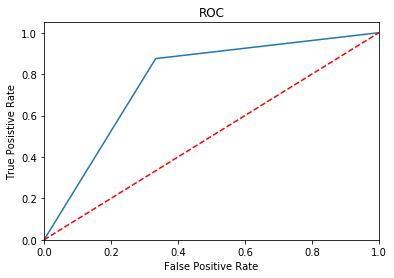

In [212]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t, c.predict(x_t))
fpr,tpr,thresholds = roc_curve(y_t, c.predict(x_t))
plt.figure()
plt.plot(fpr,tpr,label='Classifier (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Posistive Rate')
plt.title('ROC')
#plt.legend(loc="lower right")
plt.show()

In [194]:
import pandas as pd
feature_imp = pd.Series(c.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

LM35        0.633700
LDR         0.149850
DHT11       0.108225
Moisture    0.108225
dtype: float64

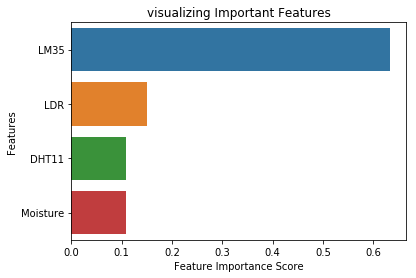

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
feature_imp = pd.Series(c.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

sns.barplot(x=feature_imp,y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('visualizing Important Features')
plt.show()

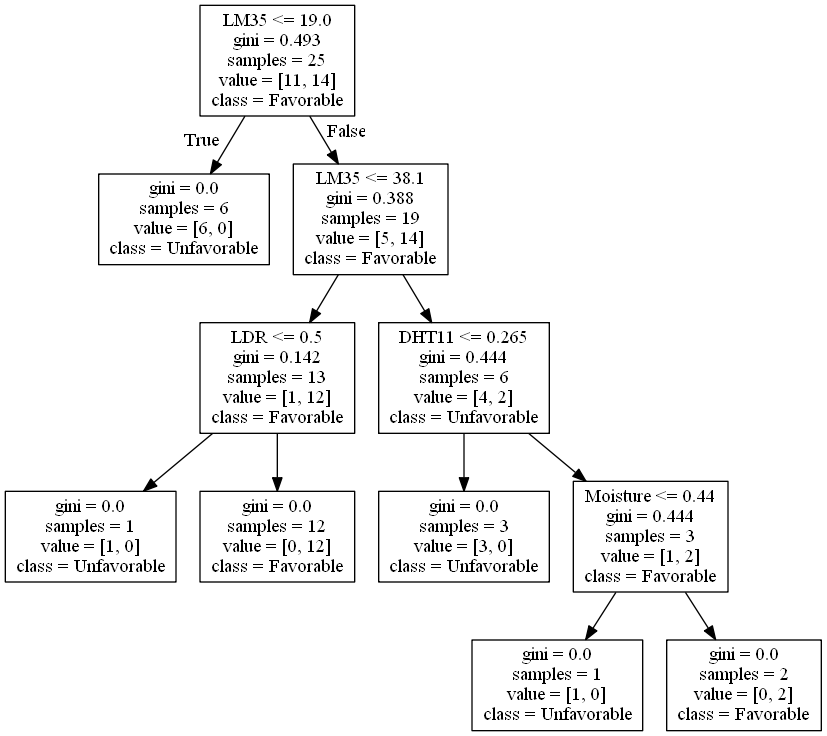

In [196]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn import datasets

# Create DOT data
dot_data = tree.export_graphviz(c, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Unfavorable','Favorable'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

True

In [209]:
# Create PNG
#graph.write_png("decisionTree.png")

import pickle
from sklearn.externals import joblib
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(c, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_t, y_t)
print(result)

0.8181818181818182
